TITLE:
The Impact of Sex and Native Country on Education Level 

INTRODUCTION:
Education inequality is prevalent all over the world with many factors (including native country, race, and sex etc.) that contribute to this disparity in overall education. Considering all these factors we wish to discover a relationship between sex and native country and their impact on education inequality through statistical analysis and data visualization in order to close the education disproportion and fix these inequality issues.

QUESTION:
Given a persons sex, race, and native country, what is their education level? 

DATASET:
[Census Income Data Set.](https://archive.ics.uci.edu/ml/datasets/Census+Income)
This dataset contains 15 different attributes (age, race, sex, marrital status, work class, occupation, capital gain, income level, education level, etc.). Each row represents one person and as you go across the row it lists their information based on those 15 attributes. The data extraction was completed by Barry Becker and its original prediction task was to determine whether a person makes over $50k per year. Though in our data prediction we will be looking at education levels.

In [1]:
set.seed(1)

library(tidyverse)
library(tidymodels)
library(repr)
library(rvest)
library(stringr)
source('tests.R')
source("cleanup.R")
options(repr.matrix.max.rows = 6)

show_digit = function(arr784, col = gray(12:1 / 12), ...) {
  arr784$X <- 0  # avoid dark pixel in top left
  image(matrix(as.matrix(arr784[-785]), nrow = 28)[, 28:1], col = col, ...)
}

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [13]:
education_data <- read.csv("project_data/adult.csv")

education_select <- education_data |>
                    filter(!(Native.country == "United-States"), !(Native.country == "?"), na.rm = TRUE) |>
                    select(Sex, Native.country, Education.level) |>
                    mutate(Sex = as.factor(Sex), 
                           Native.country = as.factor(Native.country), 
                           Education.level = as.factor(Education.level))
head(education_select)
# education_select

# education_proportions <- education_select |>
#                       group_by(Education.level) |>
#                       summarize(n = n()) |>
#                       mutate(percent = 100*n/nrow(education_select))
# education_proportions

,Sex,Native.country,Education.level
,<fct>,<fct>,<fct>
1,Female,Cuba,Bachelors
2,Female,Jamaica,9th
3,Male,India,Bachelors
4,Male,Mexico,7th-8th
5,Male,South,Some-college
6,Male,Puerto-Rico,11th


Data above is already in a tidy format and ready to be split into training and testing data!

Rows: 1,964
Columns: 3
$ Sex             <fct> Male, Male, Male, Male, Male, Female, Male, Female, Ma…
$ Native.country  <fct> India, Mexico, Cuba, Germany, Iran, Philippines, Polan…
$ Education.level <fct> Bachelors, 7th-8th, Bachelors, Bachelors, Masters, Bac…
Rows: 844
Columns: 3
$ Sex             <fct> Female, Female, Male, Male, Female, Female, Female, Ma…
$ Native.country  <fct> Cuba, Jamaica, Mexico, Mexico, Mexico, England, Mexico…
$ Education.level <fct> Bachelors, 9th, HS-grad, Some-college, Some-college, H…


Education.level,n,percent
<fct>,<int>,<dbl>
10th,48,2.443992
11th,67,3.411405
12th,33,1.680244
1st-4th,84,4.276986
5th-6th,161,8.197556
7th-8th,92,4.684318
9th,85,4.327902
Assoc-acdm,53,2.698574
Assoc-voc,54,2.749491


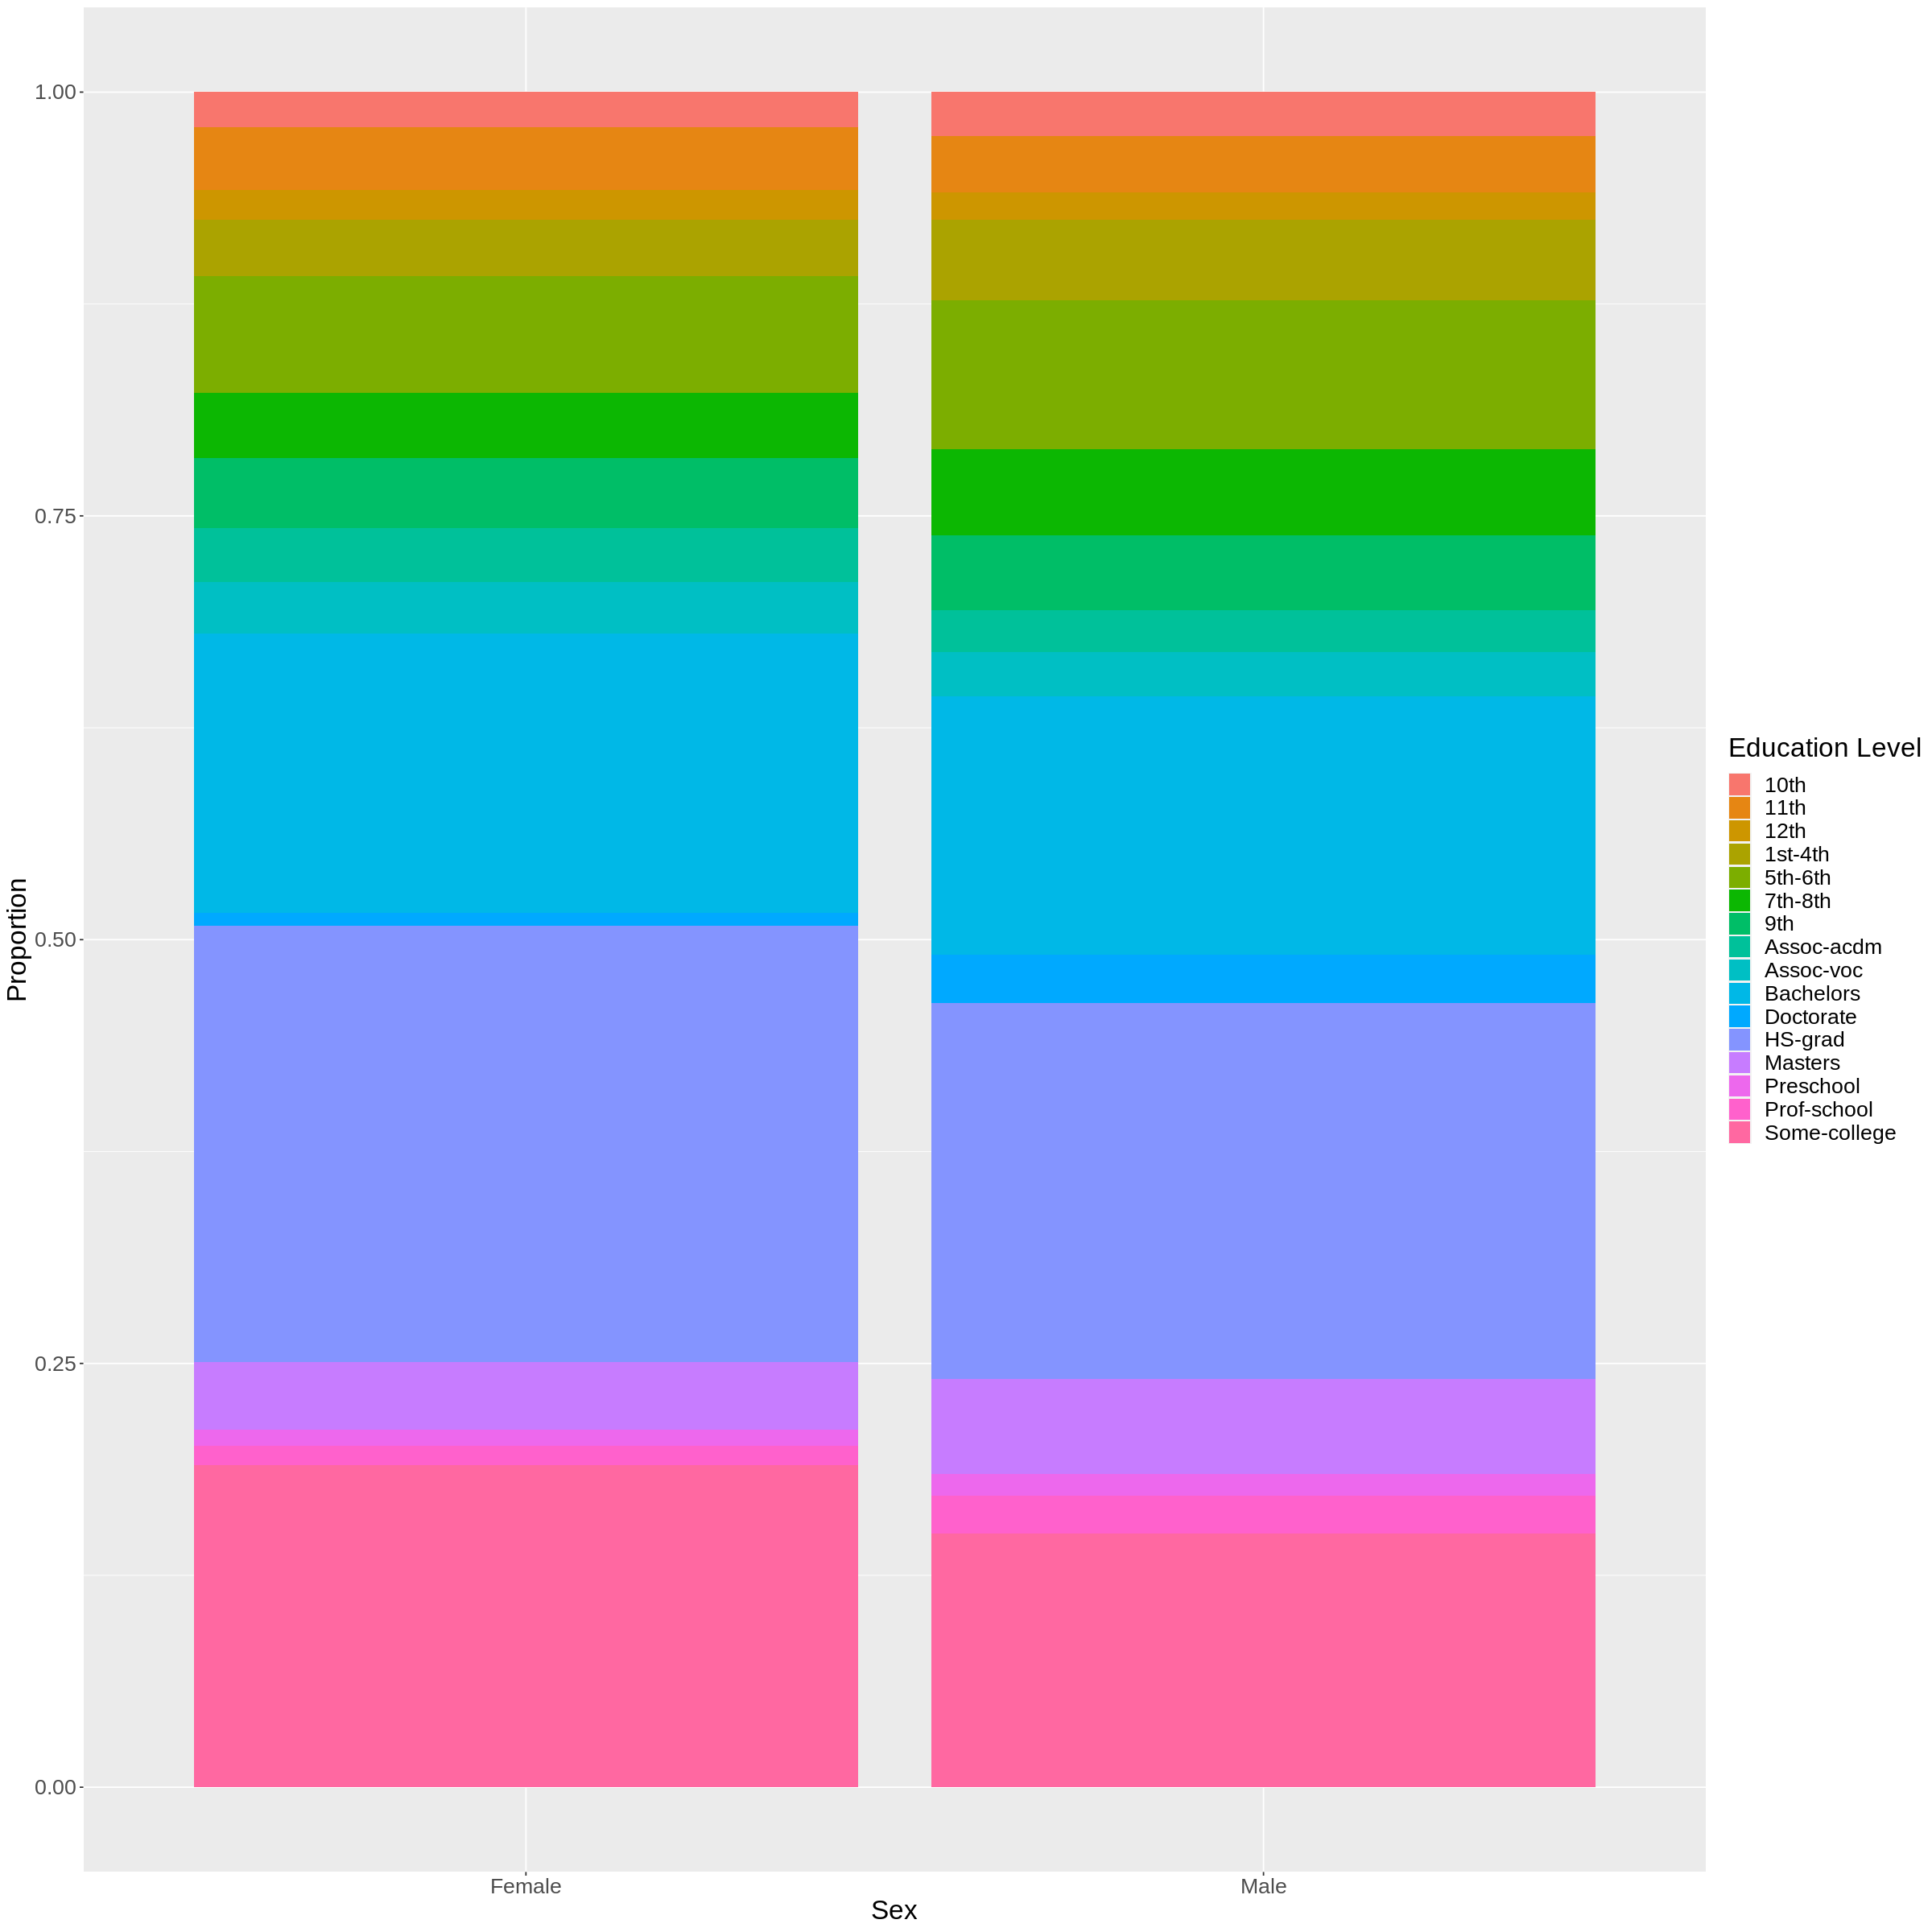

In [19]:
education_split <- initial_split(education_select, prop = 0.70, strata = Education.level)
education_train <- training(education_split)
education_test <- testing(education_split)

glimpse(education_train)
glimpse(education_test)

split_education_proportions <- education_train |>
                      group_by(Education.level) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(education_train))
split_education_proportions

education_recipe <- recipe(Education.level ~ Sex + Native.country, data = education_train) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

edu_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
                  set_engine("kknn") |>
                  set_mode("classification")

# edu_knn_fit <- workflow() |>
#           add_recipe(education_recipe) |>
#           add_model(edu_knn_spec) |>
#           fit(data = education_train)

# edu_knn_fit
options(repr.plot.width = 20, repr.plot.height = 20)
education_plot <- education_train |>
  ggplot(aes(x = Sex, fill = Education.level)) +
  geom_bar(position = "fill") +
  labs(x = "Sex",
       y = "Proportion",
       fill = "Education Level") +
    theme(text = element_text(size = 20))
    
education_plot